In [2]:
import os
os.chdir('../')

In [3]:
import pyreadr
globalumap = pyreadr.read_r('../datas/elegans/globalumap2d_Qin.rds')
globalumap = globalumap[None]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import phylovelo as pv
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FuncFormatter

/home/wangkun/miniconda3/lib/python3.9/site-packages/phylovelo/sim_utils.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
data_path = '../datas/elegans/'

In [5]:
cell_annotation = pd.read_csv('../datas/elegans/GSE126954_cell_annotation.csv', index_col=0)
count = pd.read_csv('/home/wangkun/datas/elegans/Celegans_pass_qc_counts.csv', engine='c', low_memory=False)
count = count.T

In [6]:
ab_lin_cells = cell_annotation[cell_annotation.lineage.apply(lambda x: 'AB' in str(x))].index
ab_lin_cells = ab_lin_cells[np.isin(ab_lin_cells, globalumap.index)]

In [7]:
groups = cell_annotation.loc[ab_lin_cells].groupby('lineage')

In [8]:
groups.groups.pop('MSxaapapa/ABalpappapp')

Index(['AACCATGCAGTCTTCC-300.1.1', 'AAGCCGCCAAGCGTAG-300.1.1',
       'AAGCCGCGTAAGTGGC-300.1.1', 'ATCCGAAGTTAGTGGG-300.1.1',
       'CATCAAGAGGACACCA-300.1.1', 'CCACGGAAGGCATTGG-300.1.1',
       'CCCAGTTTCATACGGT-300.1.1', 'CCGTACTCACATTCGA-300.1.1',
       'CTCGGGATCTCTAAGG-300.1.1', 'CTGTTTAAGGGAGTAA-300.1.1',
       ...
       'AGCGGTCGTCTCAACA-b02', 'CTCCTAGTCCTGCAGG-b02', 'CTCGTCAAGTACCGGA-b02',
       'CTGTTTACAAGTTAAG-b02', 'GACCTGGAGGACAGAA-b02', 'GACTAACTCTCAACTT-b02',
       'GAGGTGAGTGCACGAA-b02', 'GTACTTTCACGGTAGA-b02', 'GTAGGCCGTAAGCACG-b02',
       'GTTCATTGTCGAGATG-b02'],
      dtype='object', length=304)

In [9]:
sample1 = []
for i in groups.groups:
    sample1.append(groups.groups[i][0])

In [13]:
sd1 = pv.data_struct.scData(count=count.loc[sample1], Xdr=globalumap.loc[sample1], cell_generation=cell_annotation.loc[sample1].lineage.apply(lambda x: len(x.split('/')[0])).to_numpy().flatten())
sd1.drop_duplicate_genes(target='count')
sd1.normalize_filter(is_normalize=False, is_log=False, min_count=10, target_sum=None)

In [14]:
sd1 = pv.inference.velocity_inference(sd1, sd1.cell_generation, cutoff=0.95, target='count')

  0%|          | 0/6820 [00:00<?, ?it/s]

/home/wangkun/miniconda3/lib/python3.9/site-packages/phylovelo/inference.py:29: RuntimeWarning: invalid value encountered in double_scalars
  pmf0 = -n_zeros * np.log((1 - psi) + psi * (n / (n + mu)) ** n)
/home/wangkun/miniconda3/lib/python3.9/site-packages/phylovelo/inference.py:333: RuntimeWarning: invalid value encountered in log
  y = np.log(y + 1)
/home/wangkun/miniconda3/lib/python3.9/site-packages/phylovelo/inference.py:29: RuntimeWarning: divide by zero encountered in log
  pmf0 = -n_zeros * np.log((1 - psi) + psi * (n / (n + mu)) ** n)
/home/wangkun/miniconda3/lib/python3.9/site-packages/phylovelo/inference.py:29: RuntimeWarning: invalid value encountered in multiply
  pmf0 = -n_zeros * np.log((1 - psi) + psi * (n / (n + mu)) ** n)


In [15]:
sd1 = pv.embedding.velocity_embedding(sd1, target='count', n_neigh=15)

  0%|          | 0/364 [00:00<?, ?it/s]

(0.3, 1.65)

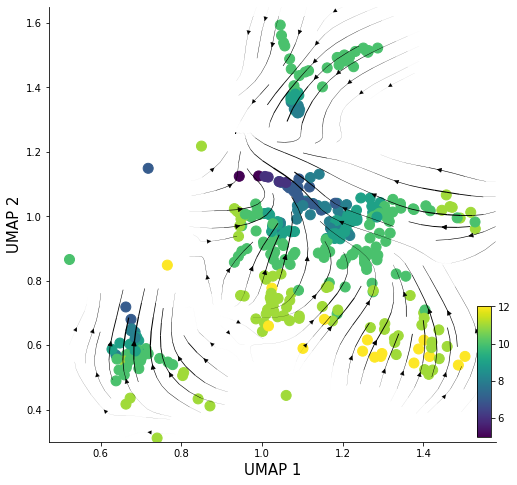

In [16]:
fig, ax = plt.subplots()
scatter = ax.scatter(sd1.Xdr.iloc[:, 0], sd1.Xdr.iloc[:, 1], c=sd1.cell_generation, s=100)
ax = pv.ana_utils.velocity_plot(sd1.Xdr.to_numpy(), sd1.velocity_embeded, ax, 'stream',streamdensity=1.2, grid_density=25, radius=0.12, lw_coef=8000)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('UMAP 1', fontsize=15)
ax.set_ylabel('UMAP 2', fontsize=15)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim([0.3, 1.65])
# plt.savefig('./figures/C.elegans/C.elegans_grid_velo.pdf', dpi='figure', format='pdf')

In [65]:
sample2 = []
for i in groups.groups:
    sample2.append(groups.groups[i][1])

In [66]:
sd2 = scData(count=count.loc[sample2], Xdr=globalumap.loc[sample2])
sd2.cell_generation = cell_annotation.loc[sd2.count.index].lineage.apply(lambda x: len(x.split('/')[0])).to_numpy().flatten()
sd2.drop_duplicate_genes(target='count')
sd2.normalize_filter(is_normalize=False, is_log=False, min_count=10, target_sum=None)

In [67]:
sd2 = velocity_inference(sd2, sd2.cell_generation, cutoff=0.95, target='count')
sd2 = velocity_embedding(sd2, target='count', n_neigh=15)

(0.3, 1.65)

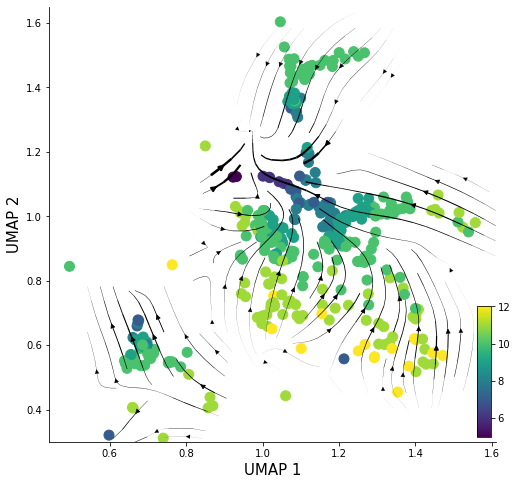

In [74]:
fig, ax = plt.subplots()
scatter = ax.scatter(sd2.Xdr.iloc[:, 0], sd2.Xdr.iloc[:, 1], c=sd2.cell_generation, s=100)
ax = velocity_plot(sd2.Xdr.to_numpy(), sd2.velocity_embeded, ax, 'stream',streamdensity=1.2, grid_density=25, radius=0.12, lw_coef=8000)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('UMAP 1', fontsize=15)
ax.set_ylabel('UMAP 2', fontsize=15)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim([0.3, 1.65])
# plt.savefig('./figures/C.elegans/C.elegans_grid_velo.pdf', dpi='figure', format='pdf')

In [69]:
sample3 = []
for i in groups.groups:
    sample3.append(groups.groups[i][2])

In [70]:
sd3 = scData(count=count.loc[sample3], Xdr=globalumap.loc[sample3])
sd3.cell_generation = cell_annotation.loc[sd3.count.index].lineage.apply(lambda x: len(x.split('/')[0])).to_numpy().flatten()
sd3.drop_duplicate_genes(target='count')
sd3.normalize_filter(is_normalize=False, is_log=False, min_count=10, target_sum=None)

In [71]:
sd3 = velocity_inference(sd3, sd3.cell_generation, cutoff=0.95, target='count')
sd3 = velocity_embedding(sd3, target='count', n_neigh=15)

/home/wangkun/LineageTracingwithscRNA/inference.py:155: RuntimeWarning: invalid value encountered in log
  y = np.log(y+1)
/home/wangkun/LineageTracingwithscRNA/inference.py:16: RuntimeWarning: invalid value encountered in double_scalars
  pmf0 = -n_zeros*np.log((1-psi)+psi*(n/(n+mu))**n)


(0.3, 1.65)

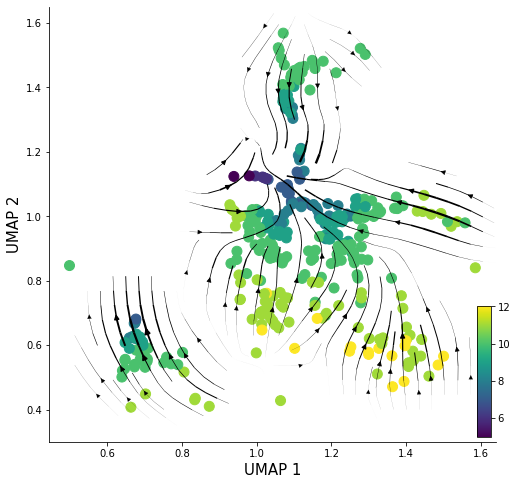

In [73]:
fig, ax = plt.subplots()
scatter = ax.scatter(sd3.Xdr.iloc[:, 0], sd3.Xdr.iloc[:, 1], c=sd3.cell_generation, s=100)
ax = velocity_plot(sd3.Xdr.to_numpy(), sd3.velocity_embeded, ax, 'stream',streamdensity=1.2, grid_density=25, radius=0.12, lw_coef=8000)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('UMAP 1', fontsize=15)
ax.set_ylabel('UMAP 2', fontsize=15)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim([0.3, 1.65])
# plt.savefig('./figures/C.elegans/C.elegans_grid_velo.pdf', dpi='figure', format='pdf')